<a href="https://colab.research.google.com/github/atharvasapre/Exploratory-Data-Analysis-Covid-19-across-the-world-John-Hopkins-University-Dataset-/blob/main/Programming_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the required libraries





In [ ]:

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as datetime


# 1. The datasets have been downloaded from the link provided.

Datasets used in this project-

1.covid19 dataset by John Hopkins

2.climate.json

3.worldpopulation.json

# 2.Extracting data from the CSV file
##THE DATASET CONTAINS THE FOLLOWING ATTRIBUTES

• **Date** - observation date in yyyy/mm/dd.

• **Country/Region** - country or region.

• **Province/State** - province or state. Note that some countries do not  have province or state and have empty values for this field.

• **Confirmed** - cumulative number of confirmed cases.

• **Recovered**- cumulative number of recovered cases.

• **Deaths** - cumulative number of deaths cases

In [ ]:
df = pd.read_csv("/content/covid19.csv")
df

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,22-01-2020,Afghanistan,NaN,0,0.0,0
1,23-01-2020,Afghanistan,NaN,0,0.0,0
2,24-01-2020,Afghanistan,NaN,0,0.0,0
3,25-01-2020,Afghanistan,NaN,0,0.0,0
4,26-01-2020,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
152050,15-07-2021,Zimbabwe,NaN,78872,49774.0,2418
152051,16-07-2021,Zimbabwe,NaN,81168,51139.0,2520
152052,17-07-2021,Zimbabwe,NaN,82613,51923.0,2588
152053,18-07-2021,Zimbabwe,NaN,83619,53453.0,2622


# 3. Merge the data for countries with multiple regions in order to provide a single time-series


##a. Finding which countries have  Provinces/States

In [ ]:
#The below snippet first row of each province/state of each country. 
#This will help us know the list of countries that have provinces/states in the dataset
sp = df.groupby(['Country/Region', 'Province/State'])
sp.first()   


Date  ...  Deaths
Country/Region Province/State                                            ...        
Australia      Australian Capital Territory                  22-01-2020  ...       0
               New South Wales                               22-01-2020  ...       0
               Northern Territory                            22-01-2020  ...       0
               Queensland                                    22-01-2020  ...       0
               South Australia                               22-01-2020  ...       0
...                                                                 ...  ...     ...
United Kingdom Gibraltar                                     22-01-2020  ...       0
               Isle of Man                                   22-01-2020  ...       0
               Montserrat                                    22-01-2020  ...       0
               Saint Helena, Ascension and Tristan da Cunha  22-01-2020  ...       0
               Turks and Caicos Islands                      22-01-2020  ...       0

[87 rows x 4 columns]

##b. List of provinces/states

In [ ]:
#This is to know the list of all the provinces of the respective countries. 
gk=sp.first()[0:55] 
gk 

Date  ...  Deaths
Country/Region Province/State                            ...        
Australia      Australian Capital Territory  22-01-2020  ...       0
               New South Wales               22-01-2020  ...       0
               Northern Territory            22-01-2020  ...       0
               Queensland                    22-01-2020  ...       0
               South Australia               22-01-2020  ...       0
               Tasmania                      22-01-2020  ...       0
               Victoria                      22-01-2020  ...       0
               Western Australia             22-01-2020  ...       0
Canada         Alberta                       22-01-2020  ...       0
               British Columbia              22-01-2020  ...       0
               Diamond Princess              22-01-2020  ...       0
               Grand Princess                22-01-2020  ...       0
               Manitoba                      22-01-2020  ...       0
               New Brunswick                 22-01-2020  ...       0
               Newfoundland and Labrador     22-01-2020  ...       0
               Northwest Territories         22-01-2020  ...       0
               Nova Scotia                   22-01-2020  ...       0
               Nunavut                       22-01-2020  ...       0
               Ontario                       22-01-2020  ...       0
               Prince Edward Island          22-01-2020  ...       0
               Quebec                        22-01-2020  ...       0
               Repatriated Travellers        22-01-2020  ...       0
               Saskatchewan                  22-01-2020  ...       0
               Yukon                         22-01-2020  ...       0
China          Anhui                         22-01-2020  ...       0
               Beijing                       22-01-2020  ...       0
               Chongqing                     22-01-2020  ...       0
               Fujian                        22-01-2020  ...       0
               Gansu                         22-01-2020  ...       0
               Guangdong                     22-01-2020  ...       0
               Guangxi                       22-01-2020  ...       0
               Guizhou                       22-01-2020  ...       0
               Hainan                        22-01-2020  ...       0
               Hebei                         22-01-2020  ...       0
               Heilongjiang                  22-01-2020  ...       0
               Henan                         22-01-2020  ...       0
               Hong Kong                     22-01-2020  ...       0
               Hubei                         22-01-2020  ...      17
               Hunan                         22-01-2020  ...       0
               Inner Mongolia                22-01-2020  ...       0
               Jiangsu                       22-01-2020  ...       0
               Jiangxi                       22-01-2020  ...       0
               Jilin                         22-01-2020  ...       0
               Liaoning                      22-01-2020  ...       0
               Macau                         22-01-2020  ...       0
               Ningxia                       22-01-2020  ...       0
               Qinghai                       22-01-2020  ...       0
               Shaanxi                       22-01-2020  ...       0
               Shandong                      22-01-2020  ...       0
               Shanghai                      22-01-2020  ...       0
               Shanxi                        22-01-2020  ...       0
               Sichuan                       22-01-2020  ...       0
               Tianjin                       22-01-2020  ...       0
               Tibet                         22-01-2020  ...       0
               Unknown                       22-01-2020  ...       0

[55 rows x 4 columns]

In [ ]:
#printing the remaining rows
gk1=sp.first()[55:87]
gk1 

Date  ...  Deaths
Country/Region Province/State                                            ...        
China          Xinjiang                                      22-01-2020  ...       0
               Yunnan                                        22-01-2020  ...       0
               Zhejiang                                      22-01-2020  ...       0
Denmark        Faroe Islands                                 22-01-2020  ...       0
               Greenland                                     22-01-2020  ...       0
France         French Guiana                                 22-01-2020  ...       0
               French Polynesia                              22-01-2020  ...       0
               Guadeloupe                                    22-01-2020  ...       0
               Martinique                                    22-01-2020  ...       0
               Mayotte                                       22-01-2020  ...       0
               New Caledonia                                 22-01-2020  ...       0
               Reunion                                       22-01-2020  ...       0
               Saint Barthelemy                              22-01-2020  ...       0
               Saint Pierre and Miquelon                     22-01-2020  ...       0
               St Martin                                     22-01-2020  ...       0
               Wallis and Futuna                             22-01-2020  ...       0
Netherlands    Aruba                                         22-01-2020  ...       0
               Bonaire, Sint Eustatius and Saba              22-01-2020  ...       0
               Curacao                                       22-01-2020  ...       0
               Sint Maarten                                  22-01-2020  ...       0
New Zealand    Cook Islands                                  22-01-2020  ...       0
United Kingdom Anguilla                                      22-01-2020  ...       0
               Bermuda                                       22-01-2020  ...       0
               British Virgin Islands                        22-01-2020  ...       0
               Cayman Islands                                22-01-2020  ...       0
               Channel Islands                               22-01-2020  ...       0
               Falkland Islands (Malvinas)                   22-01-2020  ...       0
               Gibraltar                                     22-01-2020  ...       0
               Isle of Man                                   22-01-2020  ...       0
               Montserrat                                    22-01-2020  ...       0
               Saint Helena, Ascension and Tristan da Cunha  22-01-2020  ...       0
               Turks and Caicos Islands                      22-01-2020  ...       0

[32 rows x 4 columns]

##c. Creating 2 separate lists of all those countries and their respective states/provinces

In [ ]:
countries=['Australia','Canada','China','Denmark','France','Netherlands','New Zealand','United Kingdom']
inner_list=[]

for i in countries:
  inner_list.append(list(set(df[df['Country/Region']==i]['Province/State'])))
inner_list

[['Tasmania',
  'South Australia',
  'Western Australia',
  'Australian Capital Territory',
  'New South Wales',
  'Queensland',
  'Northern Territory',
  'Victoria'],
 ['Repatriated Travellers',
  'Nova Scotia',
  'Grand Princess',
  'British Columbia',
  'Alberta',
  'Diamond Princess',
  'Quebec',
  'Ontario',
  'Saskatchewan',
  'Northwest Territories',
  'Newfoundland and Labrador',
  'Prince Edward Island',
  'Manitoba',
  'New Brunswick',
  'Nunavut',
  'Yukon'],
 ['Yunnan',
  'Guangdong',
  'Hainan',
  'Fujian',
  'Hong Kong',
  'Sichuan',
  'Guangxi',
  'Jilin',
  'Inner Mongolia',
  'Guizhou',
  'Macau',
  'Chongqing',
  'Beijing',
  'Ningxia',
  'Jiangsu',
  'Hunan',
  'Anhui',
  'Tibet',
  'Heilongjiang',
  'Jiangxi',
  'Qinghai',
  'Shandong',
  'Liaoning',
  'Tianjin',
  'Shanghai',
  'Unknown',
  'Zhejiang',
  'Xinjiang',
  'Hubei',
  'Gansu',
  'Shaanxi',
  'Shanxi',
  'Hebei',
  'Henan'],
 [nan, 'Faroe Islands', 'Greenland'],
 ['Wallis and Futuna',
  'French Guiana',
 

## d. Calculating the Total confirmed cases, Total Recovered cases and Total deaths of each country in the main dataset.

### For this we'll split the dataset into two parts.
1.dataset of countries with no provinces/states

2.dataset of countries with provinces or states


In [ ]:
# setting index to 'country/region' as to remove set of countries having provinces/states from the main dataset.
df_new = df.set_index("Country/Region")
df_new = df_new.drop(countries)
df_new=df_new.reset_index()

In [ ]:
# Calculation the Total confirmed cases, Total Recovered cases and Total deaths of the countries without states/provinces.
#After careful examination of the dataset, it can be inferred that the last reported day is 19-07-2021'
country_set1=[]
tot_conf=[]
tot_recovered=[]
tot_deaths=[]
end_date="19-07-2021"
country_set1=country_set1+list(set(df_new['Country/Region']))

for i in country_set1:
  tot_conf.append(df[df['Country/Region']==i].loc[df['Date'] == end_date]['Confirmed'].iloc[-1])
  tot_recovered.append(df[df['Country/Region']==i].loc[df['Date'] == end_date]['Recovered'].iloc[-1])
  tot_deaths.append(df[df['Country/Region']==i].loc[df['Date'] == end_date]['Deaths'].iloc[-1])



In [ ]:
# The dataset contains NaN values. This function will help in indentifying those NaN values 
def isNaN(n):
    return n != n

In [ ]:
# Calculation the Total confirmed cases, Total Recovered cases and Total deaths of the countries with states/provinces.
country_set2=countries
tot_conf2=[]
tot_recovered2=[]
tot_deaths2=[]

ptr=0
for j in (inner_list):
  
  sum1=0
  sum2=0
  sum3=0
  for k in j:
    if isNaN(k):
      sum1=sum1+int(df[df['Country/Region']==countries[ptr]].loc[df['Date'] == end_date]['Confirmed'].iloc[-1])
      sum2=sum2+int(df[df['Country/Region']==countries[ptr]].loc[df['Date'] == end_date]['Recovered'].iloc[-1])
      sum3=sum3+int(df[df['Country/Region']==countries[ptr]].loc[df['Date'] == end_date]['Deaths'].iloc[-1])
    else:
      sum1=sum1+int(df[df['Province/State']==k].loc[df['Date'] == end_date]['Confirmed'])
      try:
        sum2=sum2+int(df[df['Province/State']==k].loc[df['Date'] == end_date]['Recovered'])
      except:
        sum2=sum2+0
      sum3=sum3+int(df[df['Province/State']==k].loc[df['Date'] == end_date]['Deaths'])
  ptr+=1
  tot_conf2.append(sum1)
  tot_recovered2.append(sum2)
  tot_deaths2.append(sum3)

    




##e. Merging the 2 datasets into one to get single time-series for each country



In [ ]:
final_countries=country_set1+country_set2
final_conf=tot_conf+tot_conf2
final_rec=tot_recovered+tot_recovered2
final_death=tot_deaths+tot_deaths2


# 4.Printing total number of confirmed cases and total deaths for each country

In [ ]:
timeseries=pd.DataFrame(columns=['Country','Total Confirmed','Total Recovered', 'Total Deaths'])
timeseries['Country']=final_countries
timeseries['Total Confirmed']=final_conf
timeseries['Total Recovered']=final_rec
timeseries['Total Deaths']=final_death
timeseries

,Country,Total Confirmed,Total Recovered,Total Deaths
0,Qatar,224402,222257.0,599
1,Germany,3753220,3639640.0,91404
2,Rwanda,58235,41046.0,666
3,Ireland,285581,23364.0,5018
4,Singapore,63245,62532.0,36
...,...,...,...,...
190,Denmark,307958,294102.0,2543
191,France,5934122,408973.0,111682
192,Netherlands,1835841,27538.0,18063
193,New Zealand,2823,2745.0,26


## 4 a). What are the 10 countries with the highest number of confirmed  COVID-19 cases?

In [ ]:
timeseries.sort_values('Total Confirmed',ascending=False)[['Country','Total Confirmed']].head(10)

,Country,Total Confirmed
135,US,34132071
115,India,31144229
119,Brazil,19391845
191,France,5934122
180,Russia,5908691
181,Turkey,5537386
194,United Kingdom,5495947
124,Argentina,4769142
120,Colombia,4655921
125,Italy,4289528


## 4 b). What are the 10 countries with the highest number of deaths?

In [ ]:
timeseries.sort_values('Total Deaths',ascending=False)[['Country','Total Deaths']].head(10)

,Country,Total Deaths
135,US,609231
119,Brazil,542756
115,India,414108
49,Mexico,236469
82,Peru,195243
180,Russia,146686
194,United Kingdom,129007
125,Italy,127874
120,Colombia,116753
191,France,111682


##5.Plot a graph of the number of confirmed cases over time for each country

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

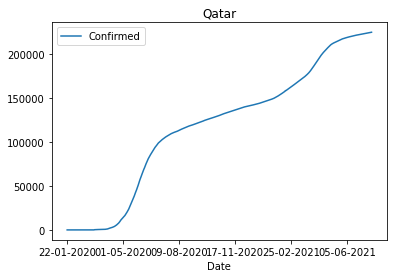

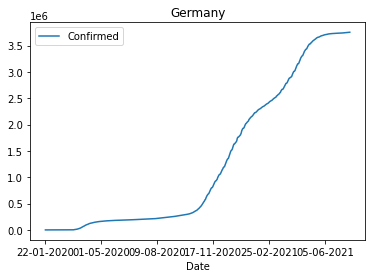

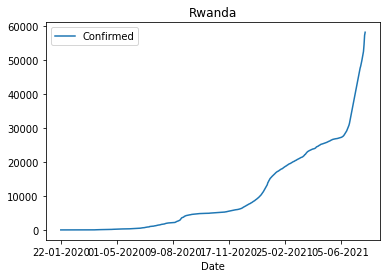

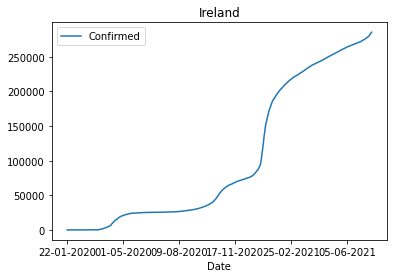

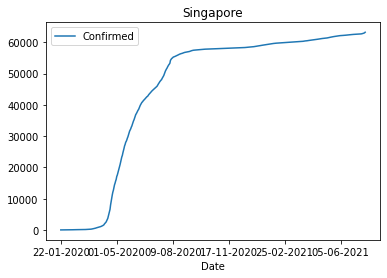

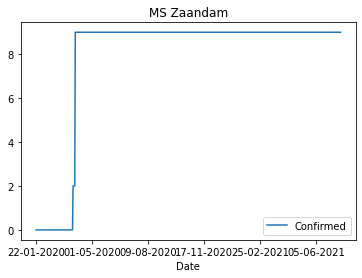

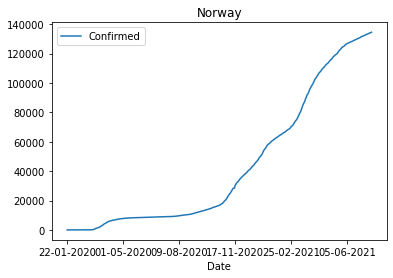

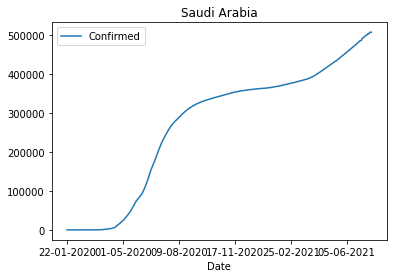

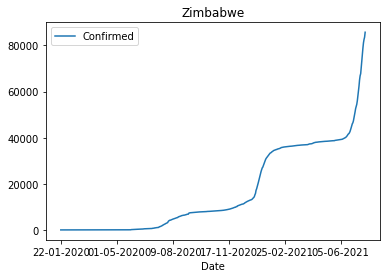

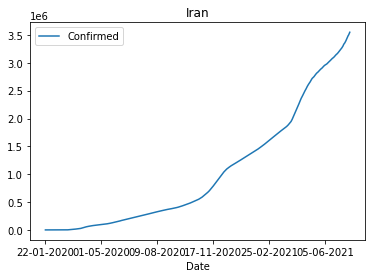

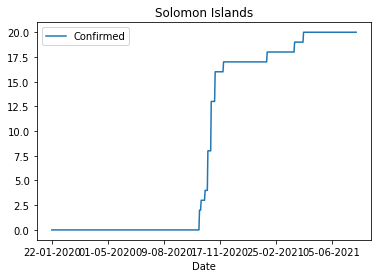

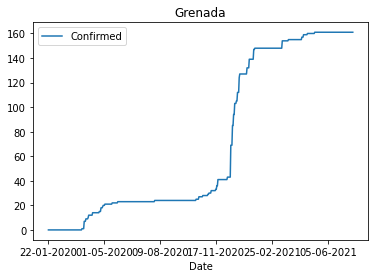

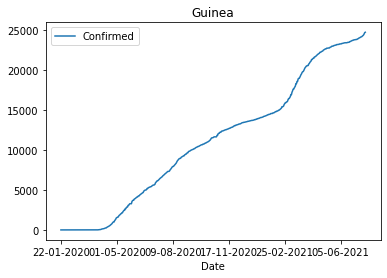

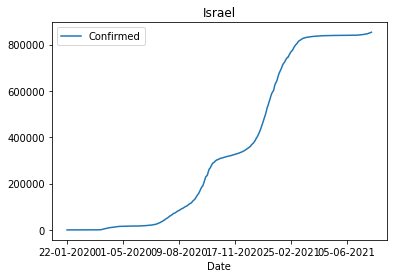

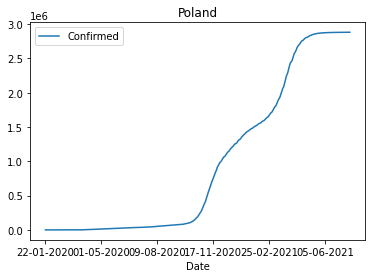

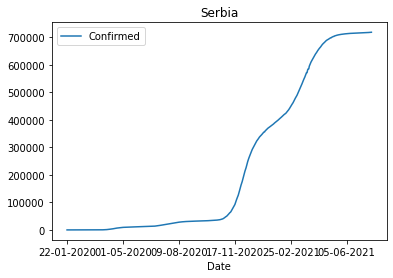

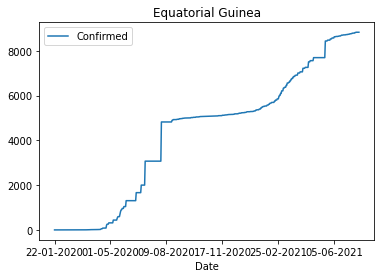

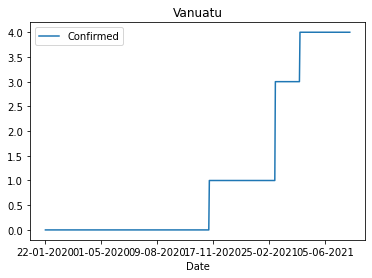

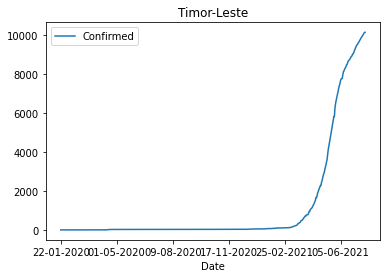

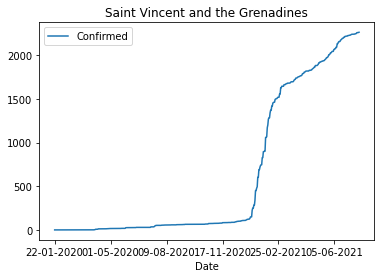

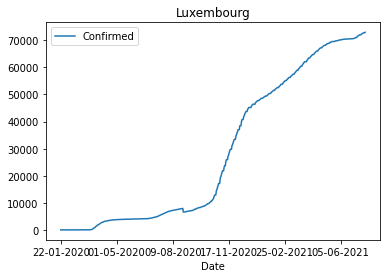

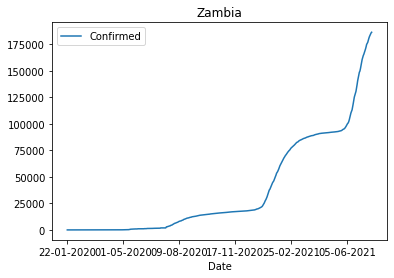

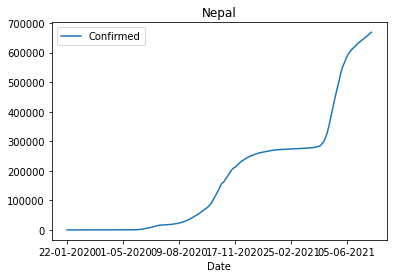

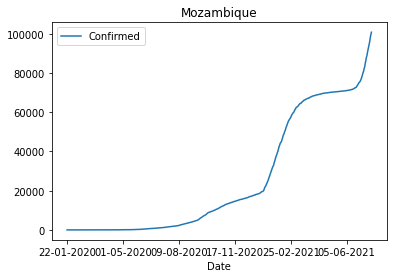

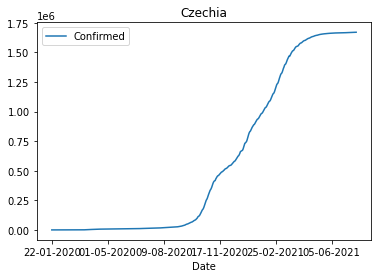

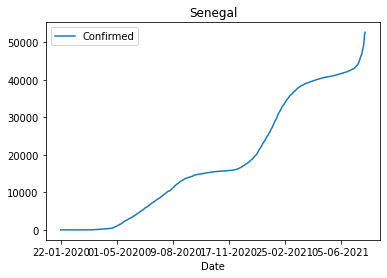

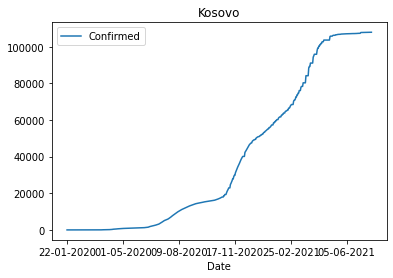

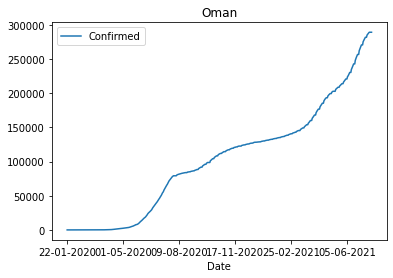

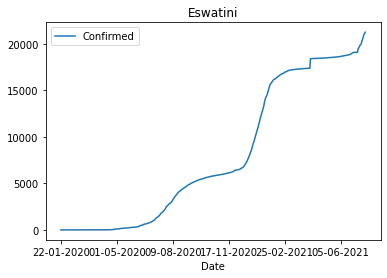

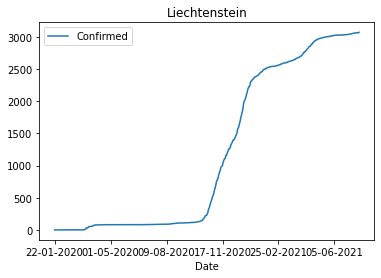

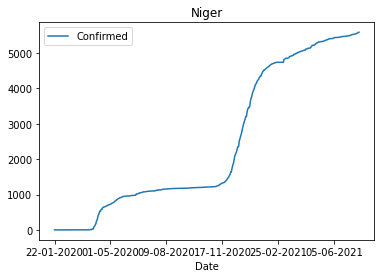

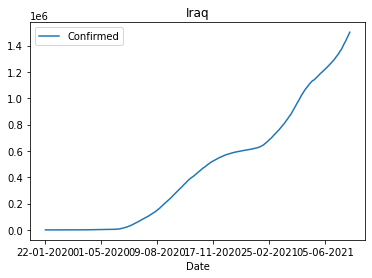

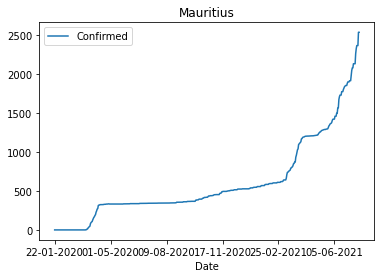

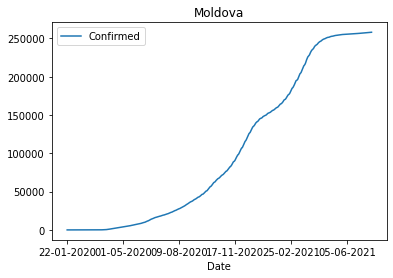

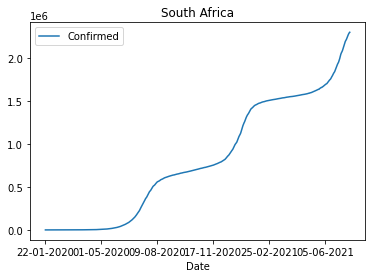

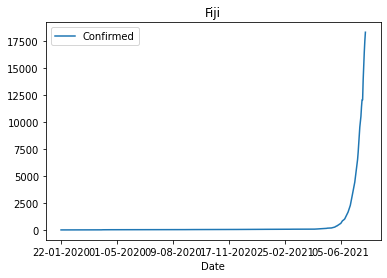

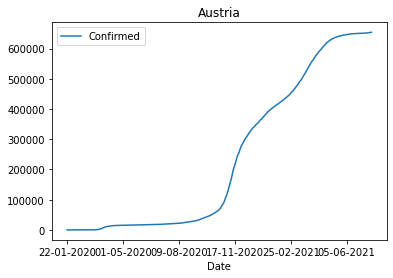

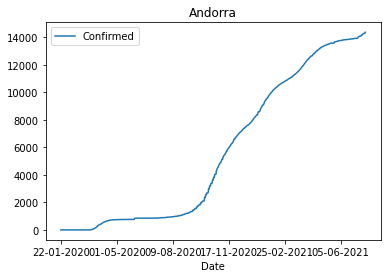

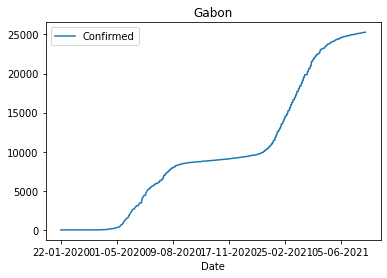

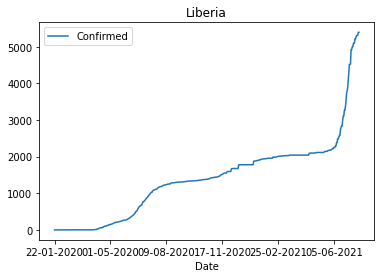

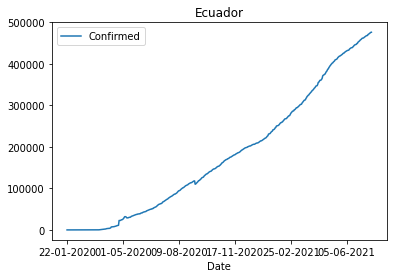

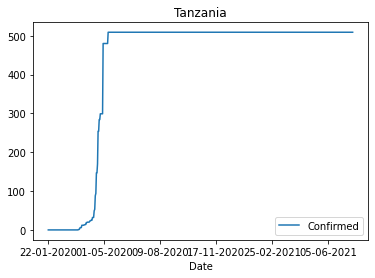

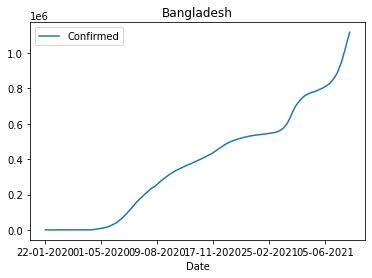

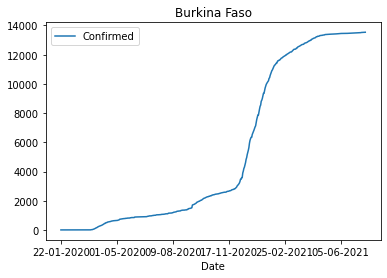

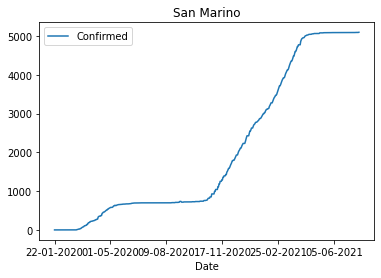

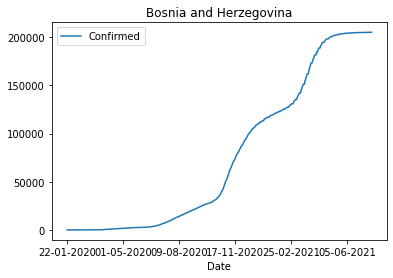

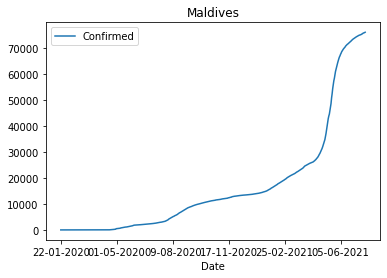

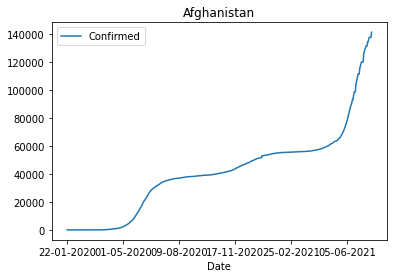

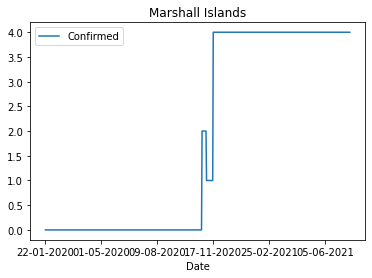

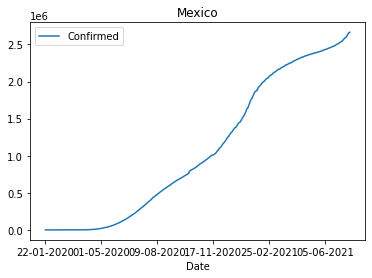

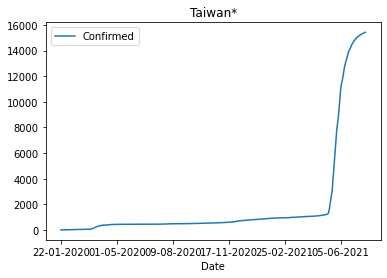

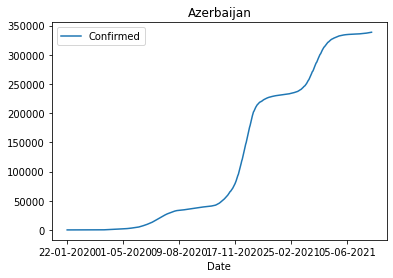

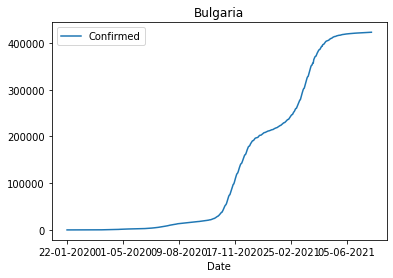

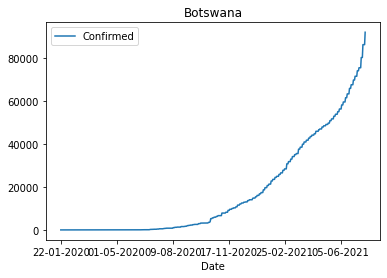

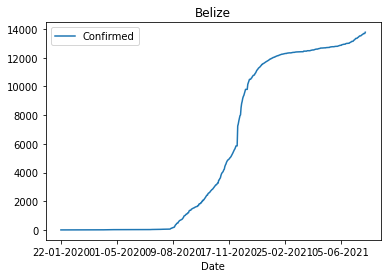

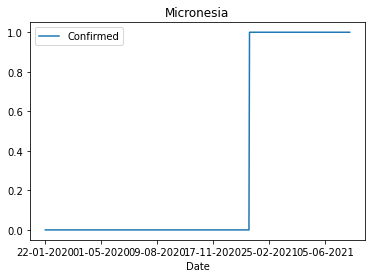

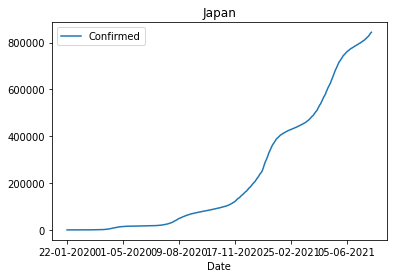

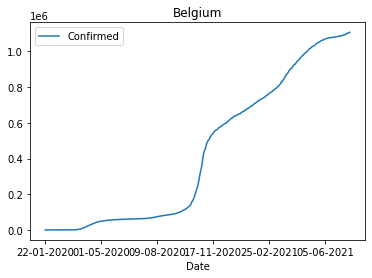

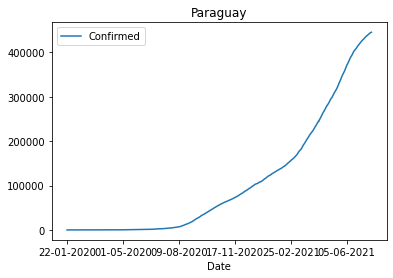

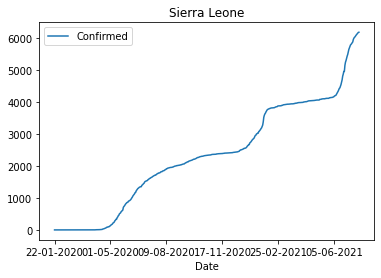

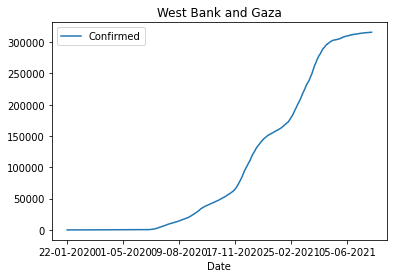

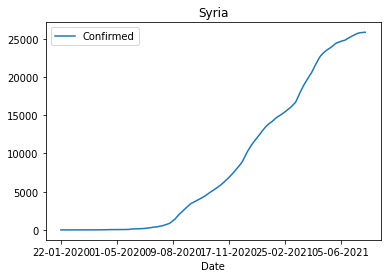

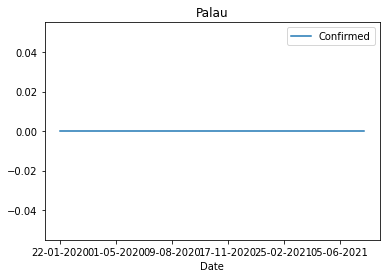

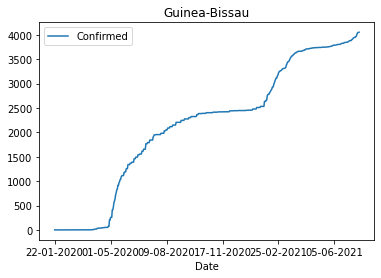

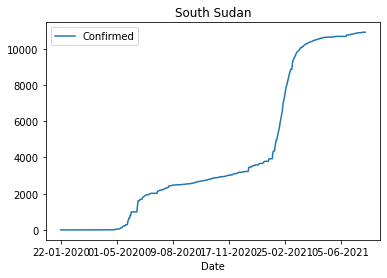

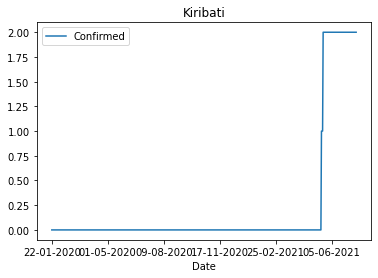

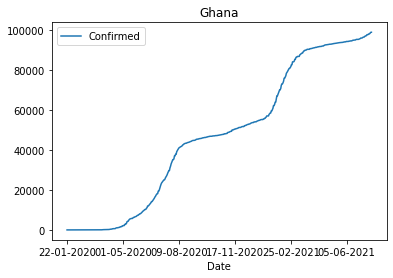

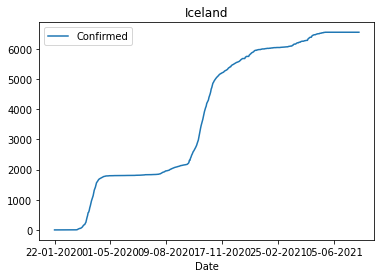

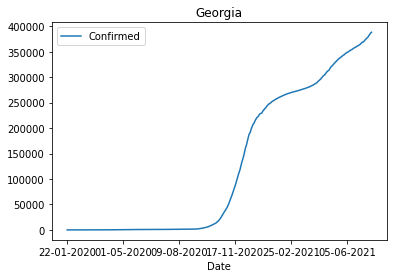

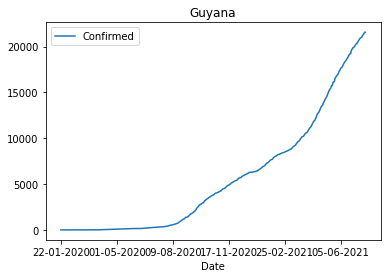

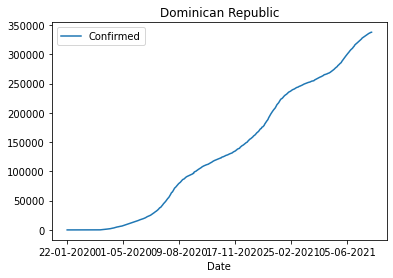

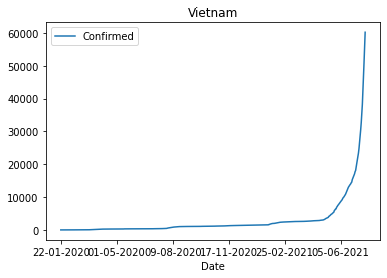

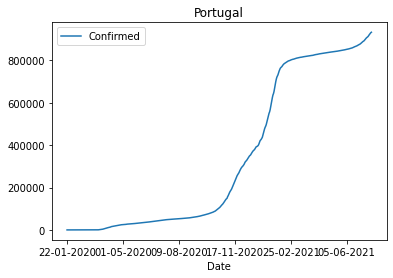

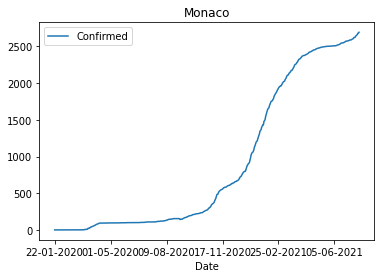

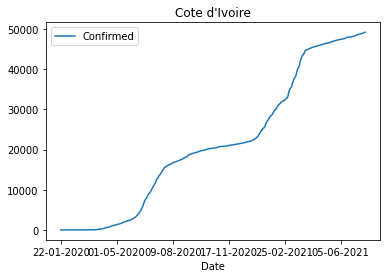

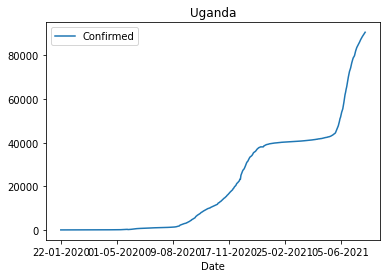

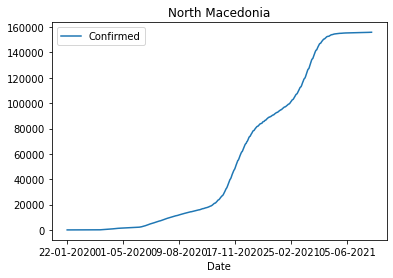

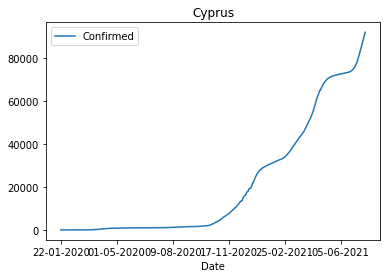

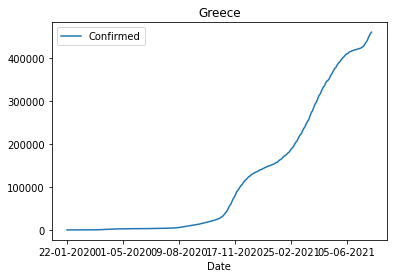

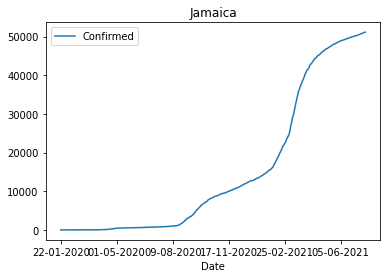

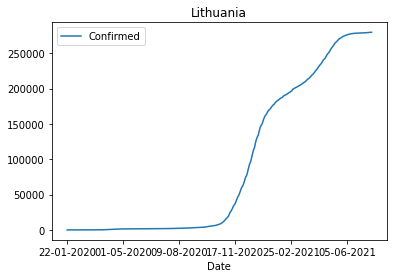

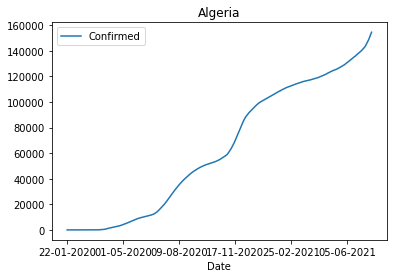

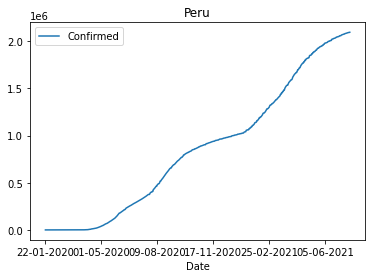

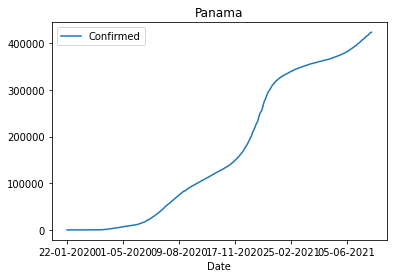

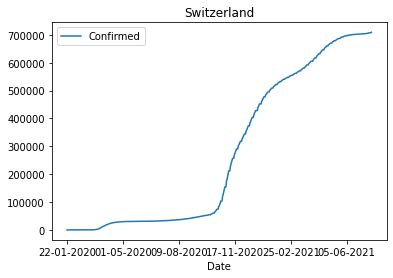

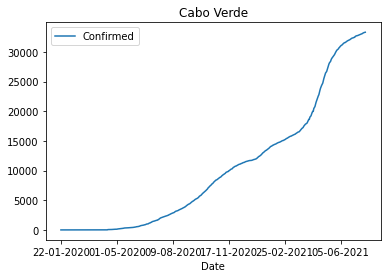

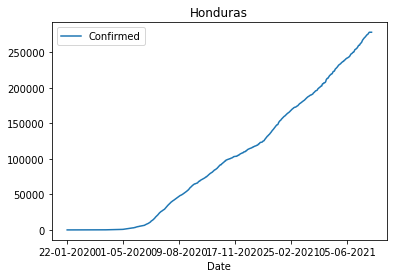

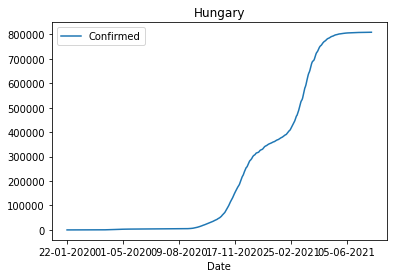

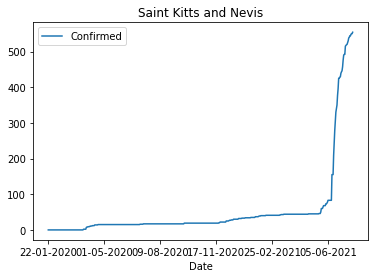

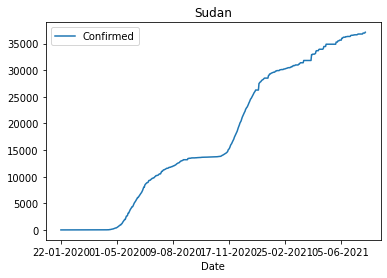

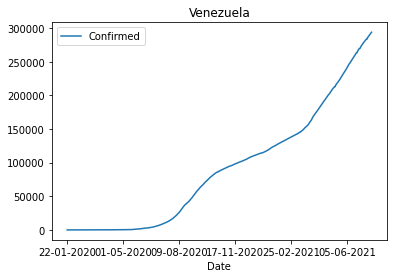

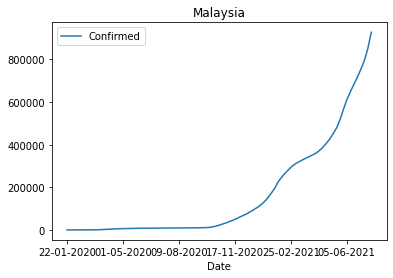

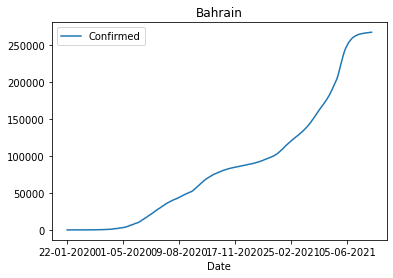

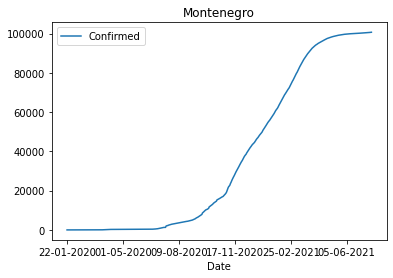

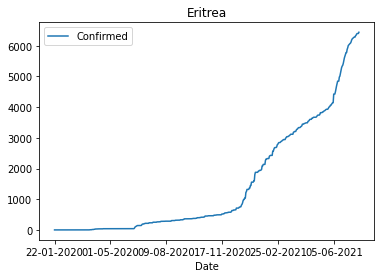

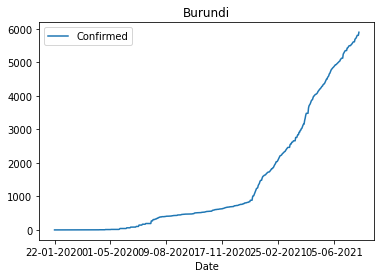

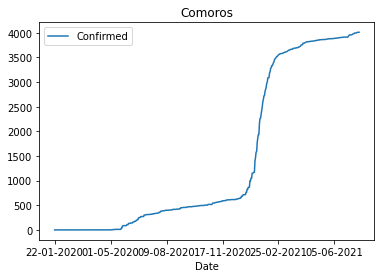

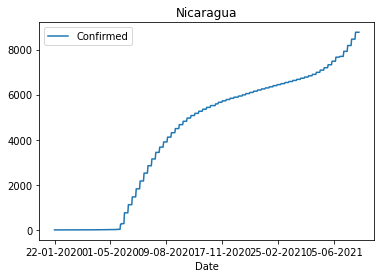

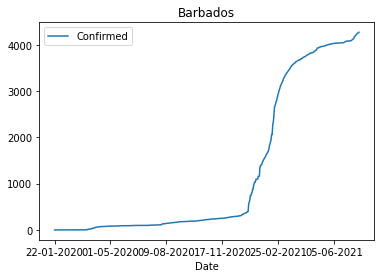

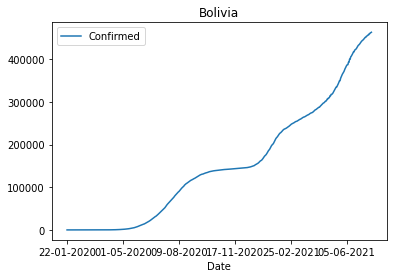

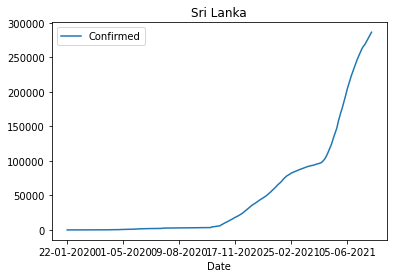

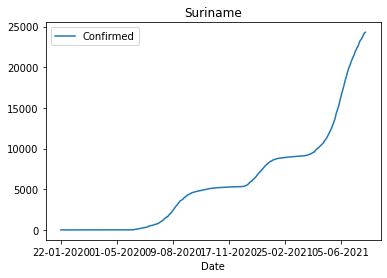

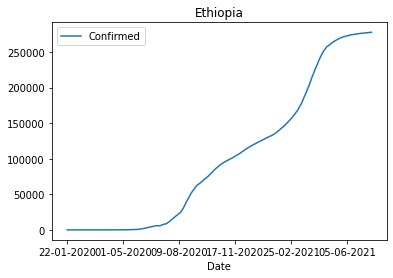

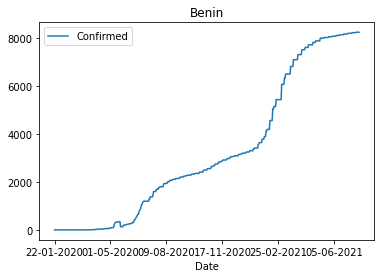

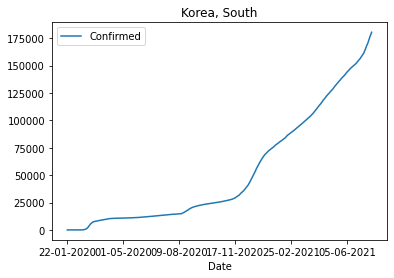

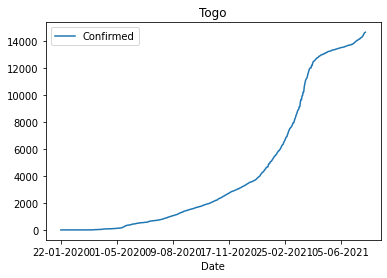

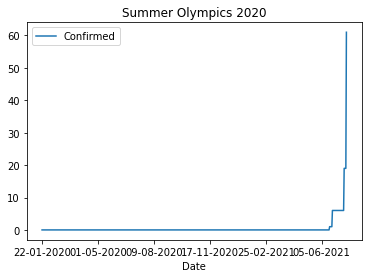

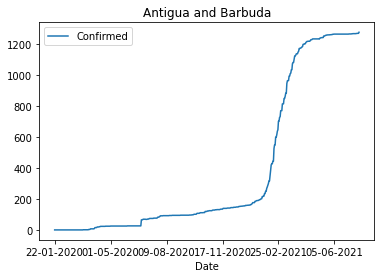

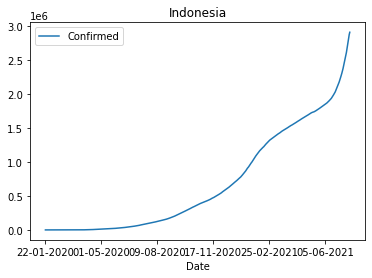

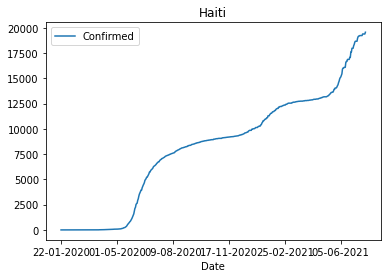

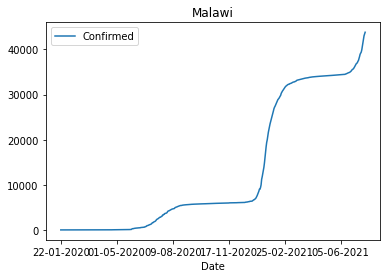

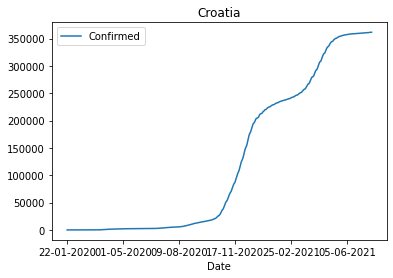

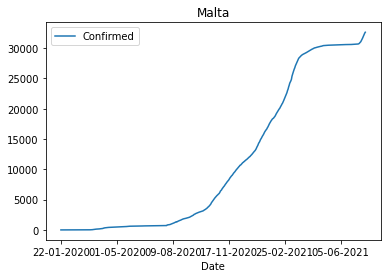

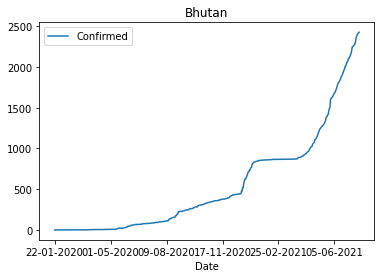

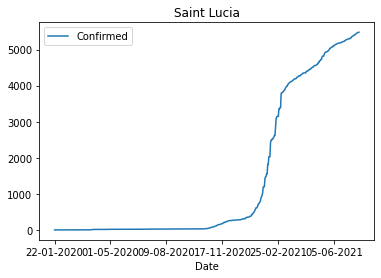

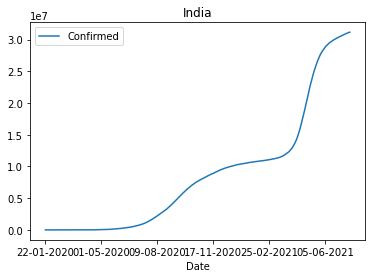

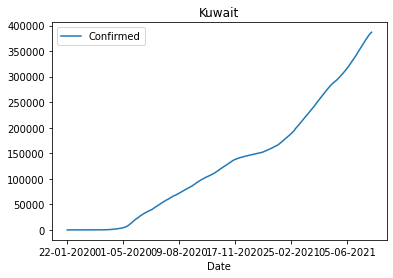

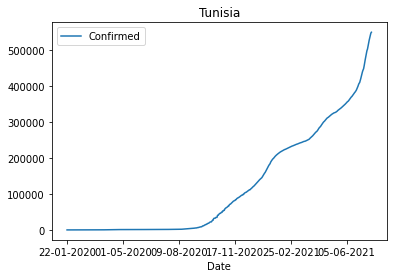

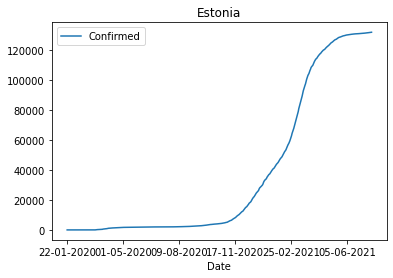

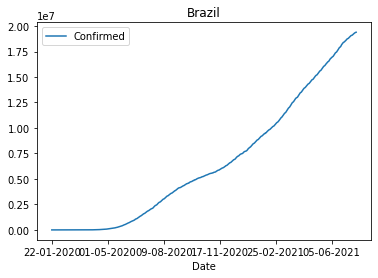

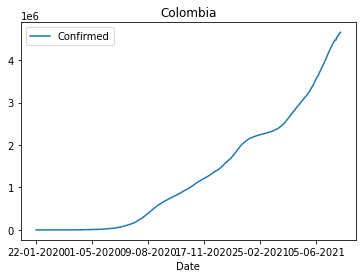

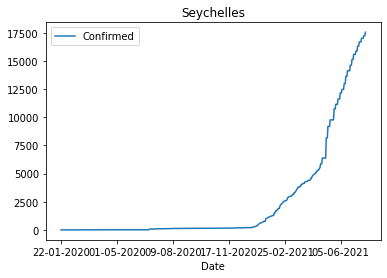

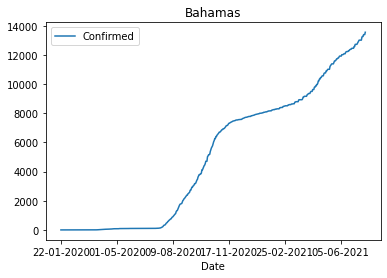

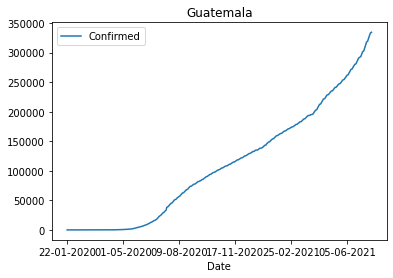

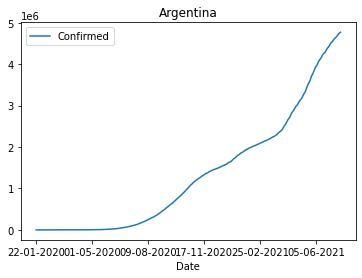

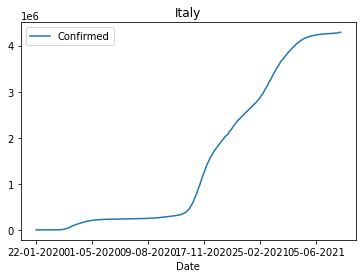

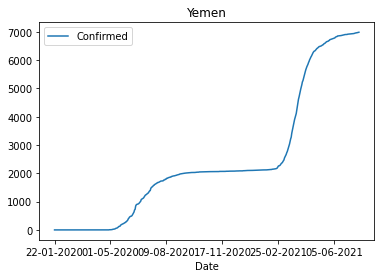

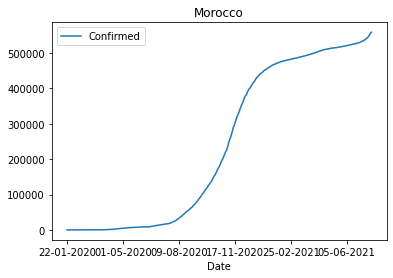

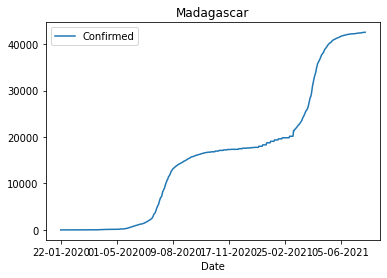

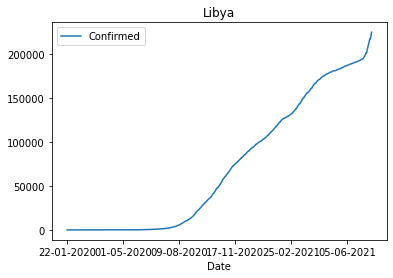

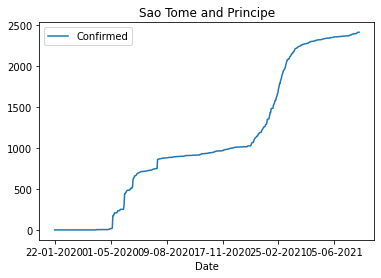

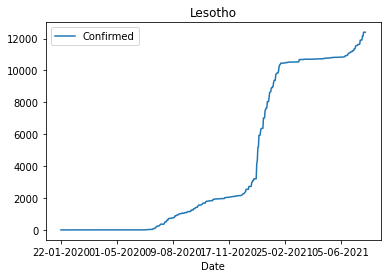

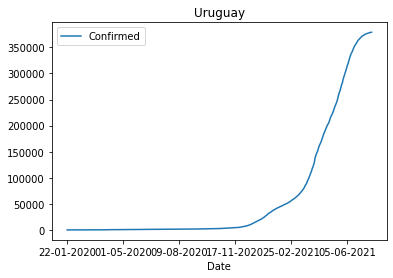

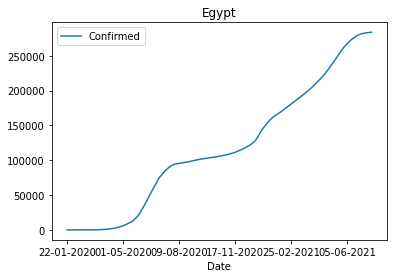

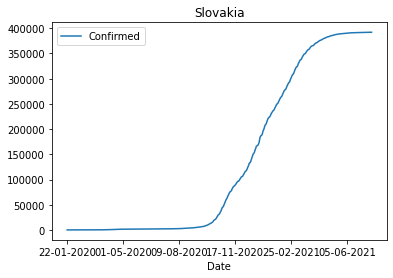

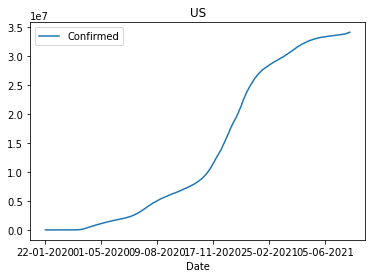

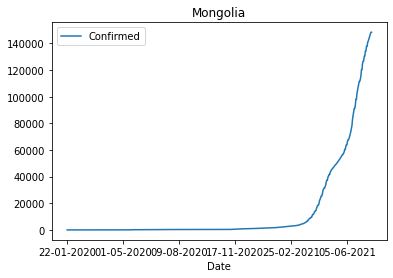

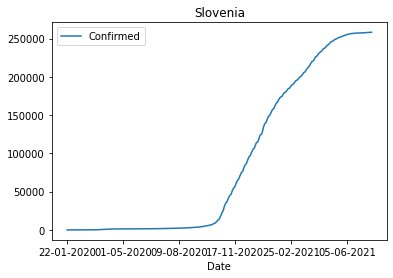

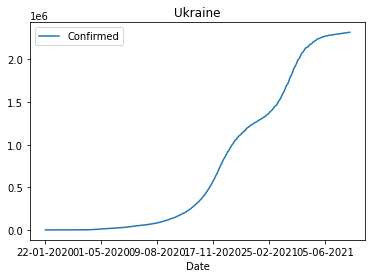

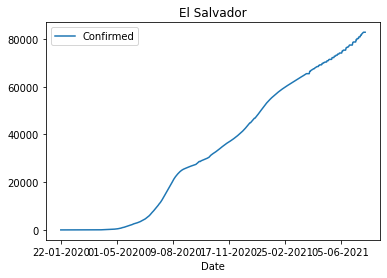

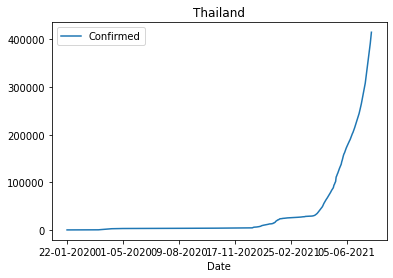

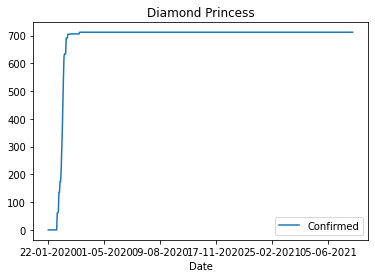

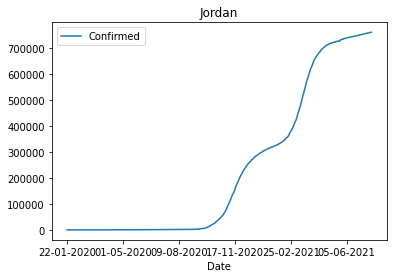

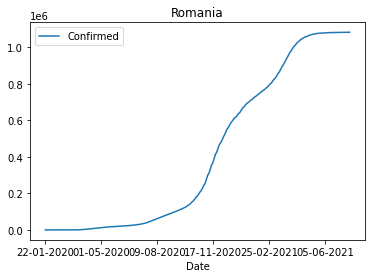

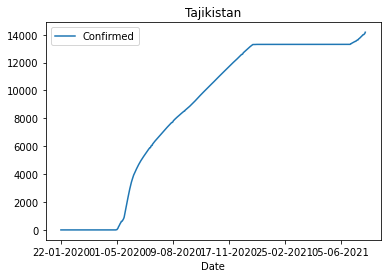

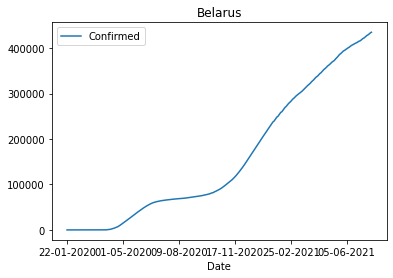

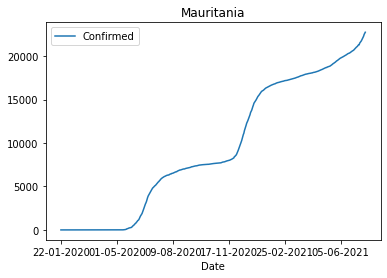

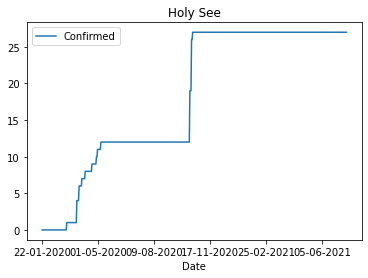

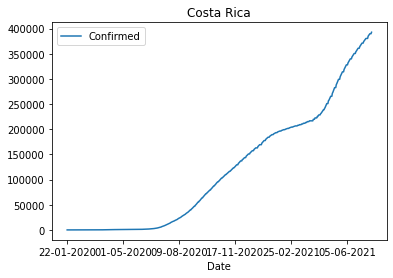

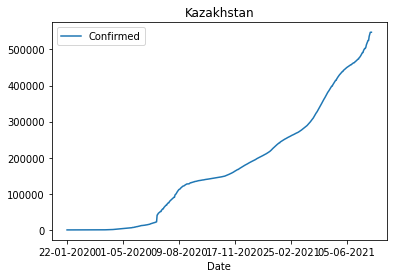

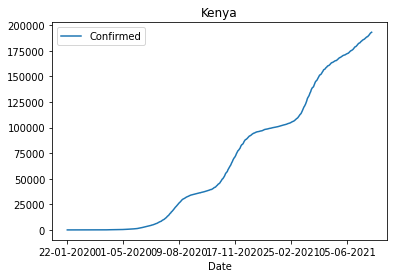

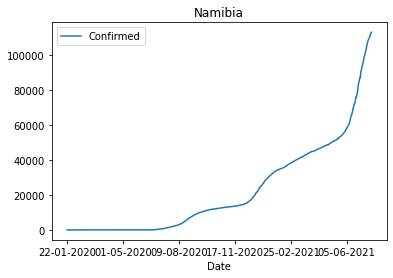

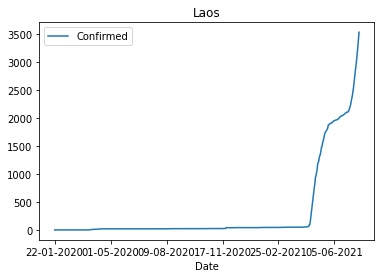

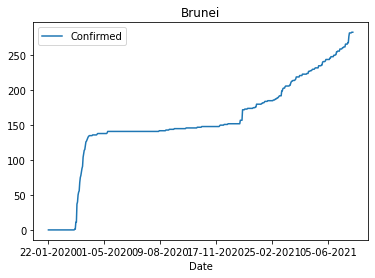

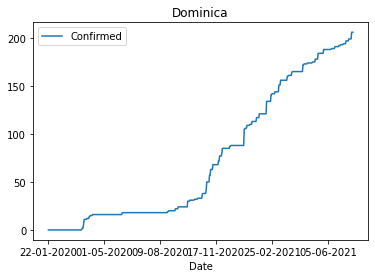

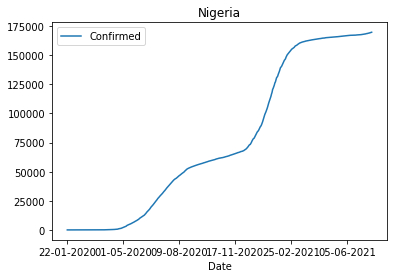

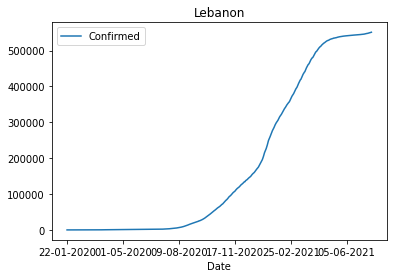

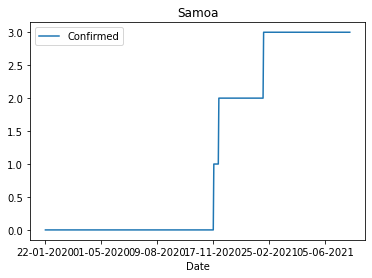

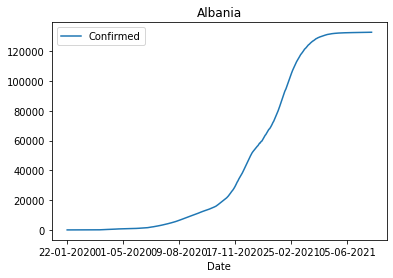

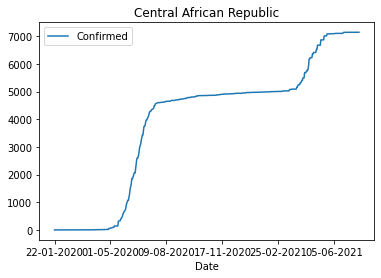

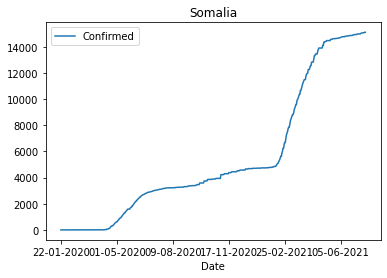

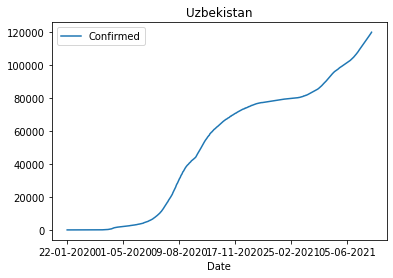

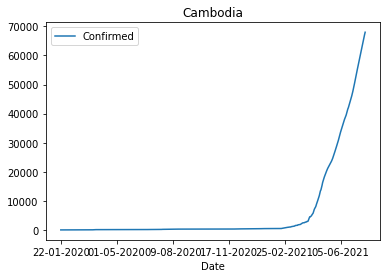

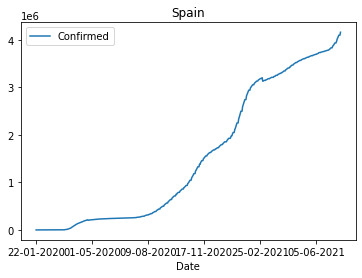

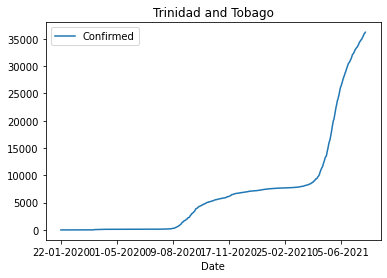

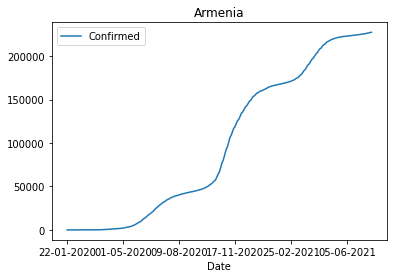

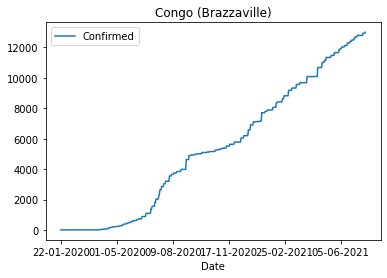

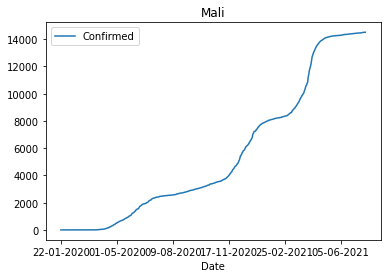

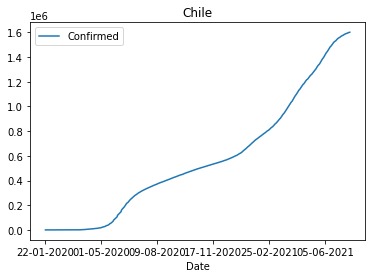

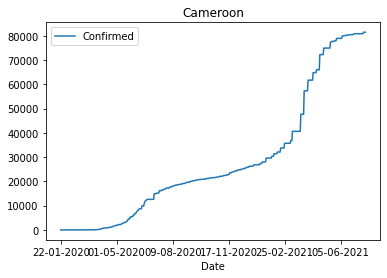

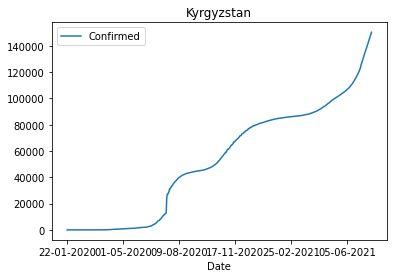

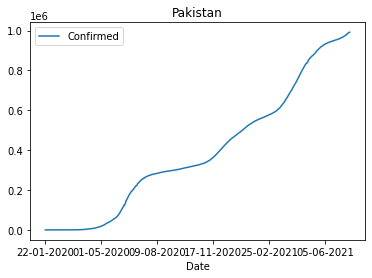

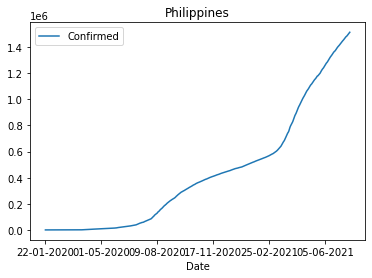

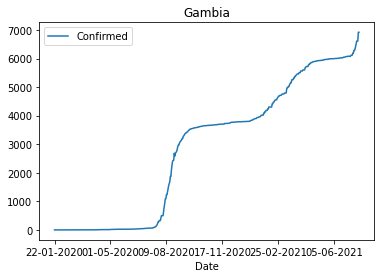

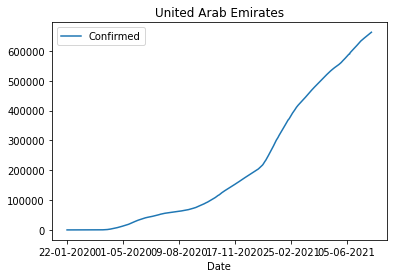

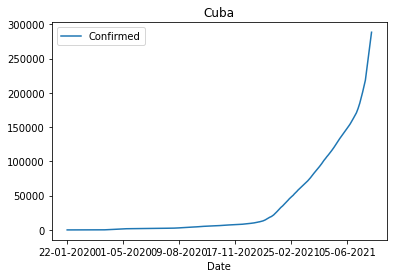

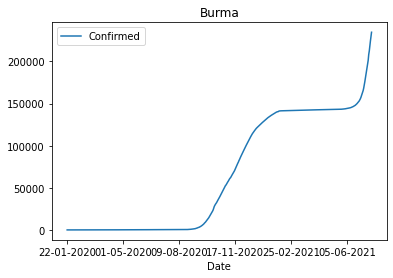

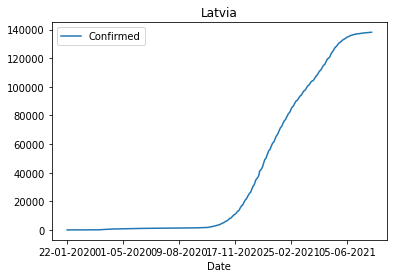

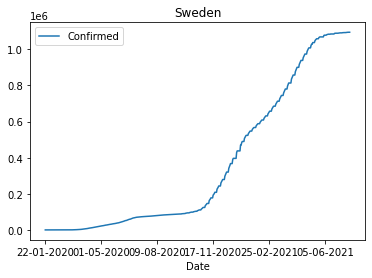

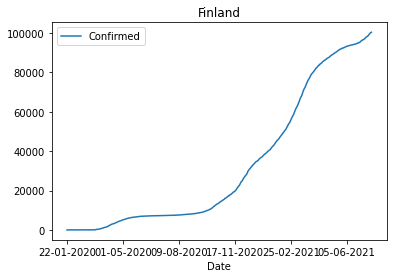

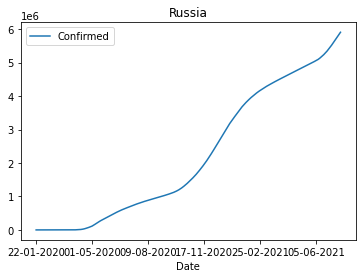

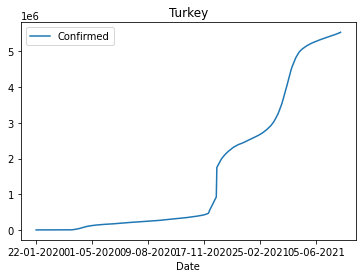

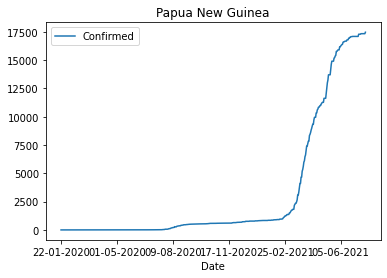

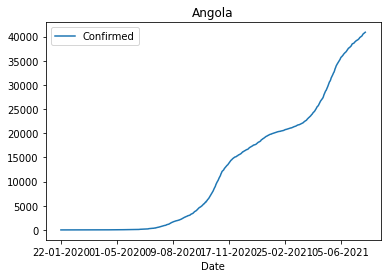

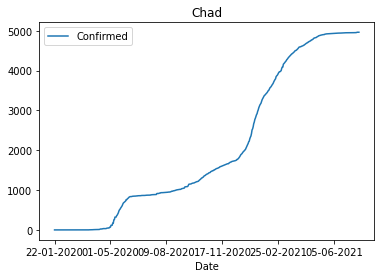

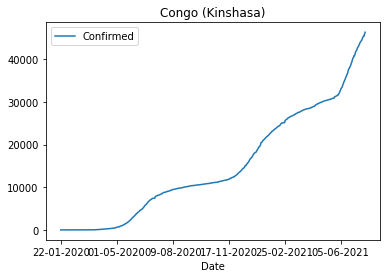

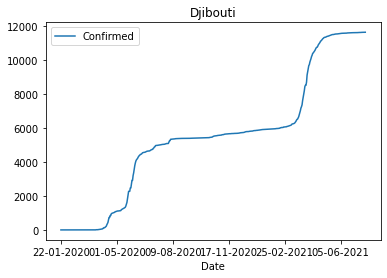

In [ ]:
df3 = df
k=1

for i in range(0,187):
  new=df3[df3['Country/Region']==country_set1[i]]
  new.plot(x='Date',y='Confirmed', title=country_set1[i])
 

# Some of the countries with exponential growth in covid cases:

Malaysia

Vietnam

Paraguay

Botswana
# Some of the countries leaving exponential growth:

Bulgaria

Maldives

Burkina Faso

Tanzania



#6.  Create a bar plot that shows the number of deaths per 100 confirmed cases (observed case-fatality ratio) for the 20 most affected countries.

## 6 a) Calculating Case Fatality Ratio of countries

(printing 22 rows because first 2 entries aren't countries)

Vanuatu - An island

Ms Zaandam- A ship

In [ ]:
timeseries['CFR %']=(timeseries['Total Deaths']/timeseries['Total Confirmed'])*100
ts_new=timeseries.sort_values('CFR %',ascending=False).head(22)
ts_new

,Country,Total Confirmed,Total Recovered,Total Deaths,CFR %
17,Vanuatu,4,3.0,1,25.000000
5,MS Zaandam,9,7.0,2,22.222222
126,Yemen,6987,4162.0,1370,19.607843
82,Peru,2094445,2060255.0,195243,9.321944
49,Mexico,2664444,2095953.0,236469,8.874985
89,Sudan,37138,30647.0,2776,7.474824
61,Syria,25840,21920.0,1905,7.372291
133,Egypt,283762,224299.0,16452,5.797816
160,Somalia,15123,7275.0,781,5.164319
50,Taiwan*,15429,12268.0,769,4.984121


##6 b). Plotting the bar graph of CFR %

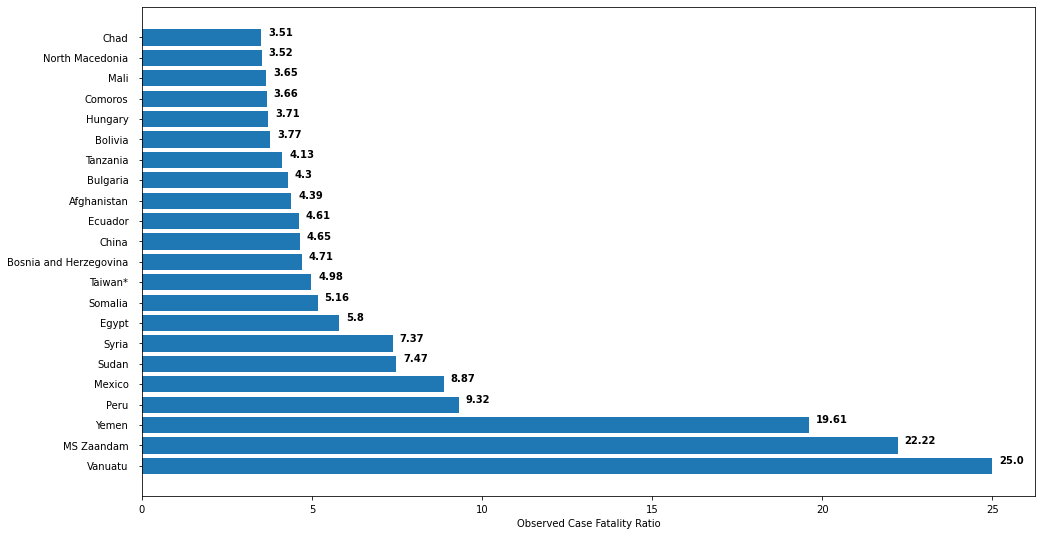

In [ ]:
countries=ts_new['Country']
cfr=ts_new['CFR %']
fig,ax=plt.subplots(figsize=(16,9))
ax.barh(countries,cfr)
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='black')
plt.xlabel('Observed Case Fatality Ratio')

plt.show()

# 7.Computing the ratio between the total number of confirmed cases and the population size of each country.

In [ ]:
#Extracting dataset from json file
world_pop = pd.read_json('worldpopulation.json')
world_pop

,Rank,country,population,World
0,1,China,1388232693,0.185
1,2,India,1342512706,0.179
2,3,U.S.,326474013,0.043
3,4,Indonesia,263510146,0.035
4,5,Brazil,211243220,0.028
...,...,...,...,...
190,191,San Marino,32104,0.000
191,192,Palau,21726,0.000
192,193,Nauru,10301,0.000
193,194,Tuvalu,9975,0.000


There are 2 different datasets (covid19 and population). In order to merge them, it is important for the 'country' column to be exactly similar in both of the datasets.

## 7 a)Using set function to know the difference so that it can be modified.

In [ ]:
# This will print the elements that are in set1 but not in set2
set1= set(world_pop['country'])
set2= set(df['Country/Region'])
set1.difference(set2)

{'Congo',
 'Czech Republic',
 "Côte d'Ivoire",
 'DR Congo',
 'Myanmar',
 'Nauru',
 'North Korea',
 'South Korea',
 'St. Vincent & Grenadines',
 'State of Palestine',
 'Swaziland',
 'TFYR Macedonia',
 'Tonga',
 'Turkmenistan',
 'Tuvalu',
 'U.K.',
 'U.S.',
 'Viet Nam'}

In [ ]:
# This will print the elements that are in set2 but not in set1
set2.difference(set1)

{'Burma',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Czechia',
 'Diamond Princess',
 'Eswatini',
 'Korea, South',
 'Kosovo',
 'MS Zaandam',
 'North Macedonia',
 'Saint Vincent and the Grenadines',
 'Summer Olympics 2020',
 'Taiwan*',
 'US',
 'United Kingdom',
 'Vietnam',
 'West Bank and Gaza'}

## 7 b) Modifying the country names in the world_pop dataset according to the names in the main dataset. Also, changing the name of the column from 'country' to 'Country' to match the column name in the main dataset

In [ ]:
world_pop['country'] = world_pop['country'].replace(['Myanmar','Czech Republic','Swaziland','South Korea', 'TFYR Macedonia', 'St. Vincent & Grenadines','U.K.','US','Viet Nam' ],['Burma','Czechia','Eswatini','Korea, South','North Macedonia','Saint Vincent and the Grenadines','United Kingdom','US','Vietnam'])

In [ ]:
#Changing the column name
world_pop = world_pop.rename(columns={'country': 'Country'})

## 7 c) Merging the two datasets

In [ ]:
# Using inner join to merge the two datasets
M4=pd.merge(timeseries,world_pop)
M4

,Country,Total Confirmed,Total Recovered,Total Deaths,CFR %,Rank,population,World
0,Qatar,224402,222257.0,599,0.266932,141,2338085,0.000
1,Germany,3753220,3639640.0,91404,2.435349,18,80636124,0.011
2,Rwanda,58235,41046.0,666,1.143642,75,12159586,0.002
3,Ireland,285581,23364.0,5018,1.757120,122,4749153,0.001
4,Singapore,63245,62532.0,36,0.056921,111,5784538,0.001
...,...,...,...,...,...,...,...,...
180,Denmark,307958,294102.0,2543,0.825762,112,5711837,0.001
181,France,5934122,408973.0,111682,1.882031,22,64938716,0.009
182,Netherlands,1835841,27538.0,18063,0.983909,66,17032845,0.002
183,New Zealand,2823,2745.0,26,0.921006,125,4604871,0.001


## 7 d). Calculating the Confirmed / Population ratio and printing the  10 countries with the highest number of confirmed COVID-19 cases per capita

In [ ]:
M4['C/T Ratio']=M4['Total Confirmed']/M4['population']
M4=M4.sort_values('C/T Ratio',ascending=False)
M4.head(10)

,Country,Total Confirmed,Total Recovered,Total Deaths,CFR %,Rank,population,World,C/T Ratio
35,Andorra,14359,13897.0,127,0.884463,186,68728,0.000,0.208925
44,Maldives,76019,73321.0,216,0.284139,170,375867,0.000,0.202250
87,Bahrain,267949,265759.0,1380,0.515023,149,1418895,0.000,0.188843
115,Seychelles,17541,16814.0,86,0.490280,183,97539,0.000,0.179836
88,Montenegro,100690,98686.0,1623,1.611878,162,626250,0.000,0.160782
42,San Marino,5099,5002.0,90,1.765052,191,32104,0.000,0.158828
23,Czechia,1671145,1638053.0,30338,1.815402,86,10555130,0.001,0.158325
19,Luxembourg,72985,70667.0,821,1.124889,164,584103,0.000,0.124952
130,Slovenia,258199,253011.0,4425,1.713794,145,2071252,0.000,0.124658
169,Sweden,1094287,0.0,14646,1.338406,89,9920624,0.001,0.110304


# 8. Extracting the climate dataset

In [ ]:
climate = pd.read_json('climate.json')
climate

,id,city,country,monthlyAvg
0,1,Amsterdam,Netherlands,"[{'high': 7, 'low': 3, 'dryDays': 19, 'snowDay..."
1,2,Athens,Greece,"[{'high': 12, 'low': 7, 'dryDays': 21, 'snowDa..."
2,3,Atlanta GA,United States,"[{'high': 12, 'low': 2, 'dryDays': 18, 'snowDa..."
3,4,Auckland,New Zealand,"[{'high': 23, 'low': 16, 'dryDays': 24, 'snowD..."
4,5,Austin TX,United States,"[{'high': 18, 'low': 6, 'dryDays': 15, 'snowDa..."
...,...,...,...,...
100,101,Albuquerque NM,United States,"[{'high': 10, 'low': -4, 'dryDays': 24, 'snowD..."
101,102,Vermont IL,United States,"[{'high': 3, 'low': -8, 'dryDays': 18, 'snowDa..."
102,103,Nashville TE,United States,"[{'high': 9, 'low': -1, 'dryDays': 18, 'snowDa..."
103,104,St. Louis MO,United States,"[{'high': 7, 'low': -4, 'dryDays': 16, 'snowDa..."


###8 a) Checking what countries are a part of the climate dataset

In [ ]:
set(climate['country'])

{'Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'China',
 'Czech Republic',
 'Denmark',
 'France',
 'Germany',
 'Greece',
 'Hawaii',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Malaysia',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Russia',
 'Singapore',
 'South Africa',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Turkey',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Vietnam'}

### 8 b) This will let us the know the cities common to both the datasets. The following cities will be used to plot a graph of the monthly number of confirmed cases vs. the average monthly temperature.

In [ ]:
set(df['Province/State']).intersection((climate['city']))

{'Beijing', 'Hong Kong', 'Shanghai'}

### 8c) Plotting Graphs  for the following cities :

a) Beijing

b) Hong Kong

c) Shanghai

### 8 c) (i) BEIJING (CHINA)

Starting off by creating a a separate dataset for beijing.
This data set will only contain rows related to beijing

In [ ]:

china_b=df[df['Province/State']=='Beijing']
china_b['Date']=china_b['Date'] = pd.to_datetime(china_b['Date'])   # Converting elements of the 'Date' column to datetime type.
china_b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
32155,2020-01-22,China,Beijing,14,0.0,0
32156,2020-01-23,China,Beijing,22,0.0,0
32157,2020-01-24,China,Beijing,36,1.0,0
32158,2020-01-25,China,Beijing,41,2.0,0
32159,2020-01-26,China,Beijing,68,2.0,0
...,...,...,...,...,...,...
32695,2021-07-15,China,Beijing,1079,1063.0,9
32696,2021-07-16,China,Beijing,1079,1063.0,9
32697,2021-07-17,China,Beijing,1083,1064.0,9
32698,2021-07-18,China,Beijing,1084,1064.0,9


## Considering only the first 12 months starting from January 2020 as the climate dataset has records only for 12 months.

In [ ]:
start = datetime.datetime(2020,1,1)
end = datetime.date(start.year, 12, 31)
business_days =pd.date_range(start, end, freq='BM') #This will create a list of last date of every month from january 2020 - dec 2020
business_days

DatetimeIndex(['2020-01-31', '2020-02-28', '2020-03-31', '2020-04-30',
               '2020-05-29', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-30', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='BM')

## Calculating the monthly confirmed cases from january2020 to december 2020

In [ ]:
confirmed_monthly=[]
for i in business_days:
  confirmed_monthly.append(int(china_b[china_b['Date']==i]['Confirmed']))
confirmed_monthly



[139, 410, 580, 593, 593, 922, 933, 935, 936, 942, 951, 987]

## Creating a list of monthly average temperature 


In [ ]:
monthlyAvg=list(climate[climate['city']=='Hong Kong']['monthlyAvg'])
ma=[]
for i in range(0,12):
  ma.append(monthlyAvg[0][i]['high'])
ma

[18, 19, 21, 25, 29, 31, 32, 32, 31, 28, 25, 21]

## Creating a dataframe for plotting the monthly average temperature vs Confirmed cases

In [ ]:
temp=pd.DataFrame({"month":['January','February','March','April','May','June', 'July','August','September','October','November','December'], "confirmed" :confirmed_monthly, "temperature":ma })
temp


,month,confirmed,temperature
0,January,139,18
1,February,410,19
2,March,580,21
3,April,593,25
4,May,593,29
5,June,922,31
6,July,933,32
7,August,935,32
8,September,936,31
9,October,942,28


## Plotting the graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Legend does not support 8 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Legend does not support 10 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Legend does not support 14 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Legend does not support 20 instances.
A proxy artist may be used instead.
See: http://

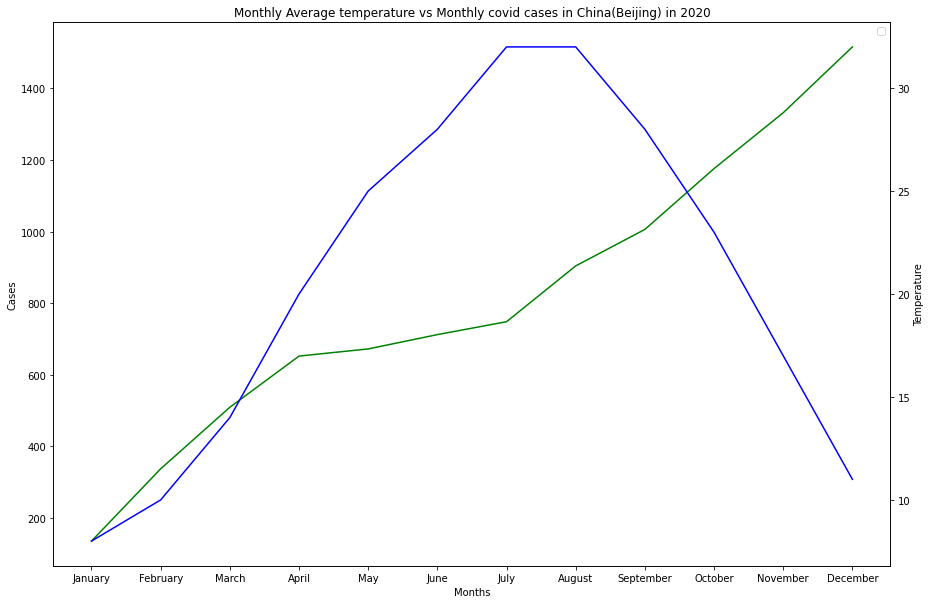

In [ ]:
x=temp['month']
y=temp['temperature']
y1=temp['confirmed']
fig, ax = plt.subplots(figsize = (15, 10))
plt.title('Monthly Average temperature vs Monthly covid cases in China(Beijing) in 2020')

plt.ylabel('Cases')
plt.xlabel('Months')

ax2 = ax.twinx()
ax.plot(x, y1, color = 'g')
ax2.plot(x, y, color = 'b')
plt.ylabel('Temperature')
plt.legend(y,y1)
plt.show()

## There is hardly any correlation between the monthly average temperature and the monthly number of covid cases. Check the below cell. So the hypothesis does not hold any water.

In [ ]:
y1.corr(y)

0.6836290986171173

## Similarly we can plot the graph of Hong Kong and Shanghai

### 8 c) (ii) Hong Kong (China)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7f6cab903ad0> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: UserWarning: Legend does not support <matplotlib.axes._subplots.AxesSubplot object at 0x7f6cab98a790> instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-t

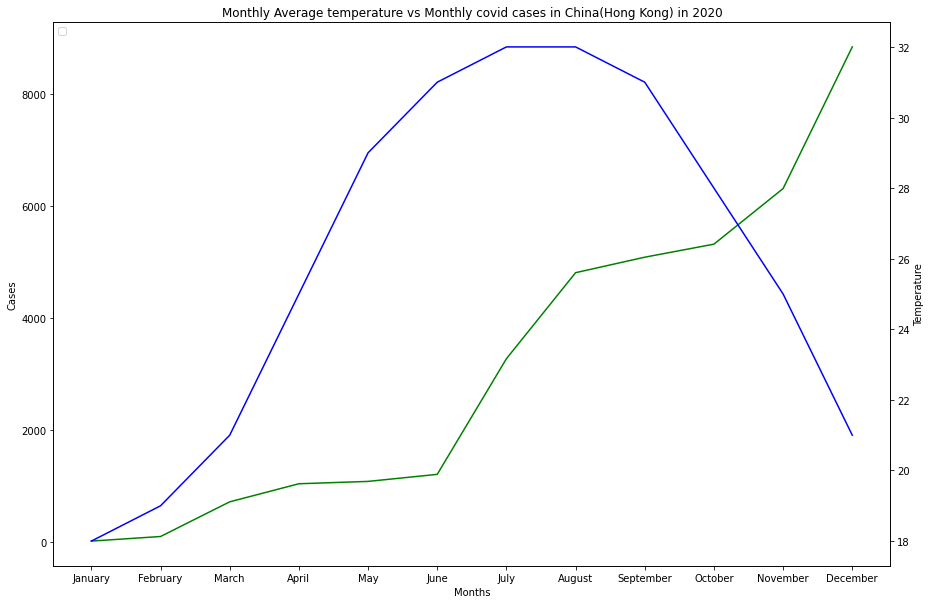

In [ ]:
china_hk=df[df['Province/State']=='Hong Kong']
china_hk['Date']=pd.to_datetime(china_hk['Date'])

start = datetime.datetime(2020,1,1)
end = datetime.date(start.year, 12, 31)
business_days =pd.date_range(start, end, freq='BM')

confirmed_monthly=[]
for i in business_days:
  confirmed_monthly.append(int(china_hk[china_hk['Date']==i]['Confirmed']))


monthlyAvg=list(climate[climate['city']=='Hong Kong']['monthlyAvg'])
ma=[]
for i in range(0,12):
  ma.append(monthlyAvg[0][i]['high'])


temp=pd.DataFrame({"month":['January','February','March','April','May','June', 'July','August','September','October','November','December'], "confirmed" :confirmed_monthly, "temperature":ma })
temp

x=temp['month']
y=temp['temperature']
y1=temp['confirmed']
fig, ax = plt.subplots(figsize = (15, 10))
plt.ylabel('Cases')
plt.xlabel('Months')
plt.title('Monthly Average temperature vs Monthly covid cases in China(Hong Kong) in 2020')
ax2 = ax.twinx()
ax.plot(x, y1, color = 'g')
ax2.plot(x, y, color = 'b')
plt.ylabel('Temperature')
plt.legend(handles=[], loc='upper left')
plt.show()


# Correlation

In [ ]:
y1.corr(y)

0.229094176670517

## 8 c)  (iii) Shanghai (China)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


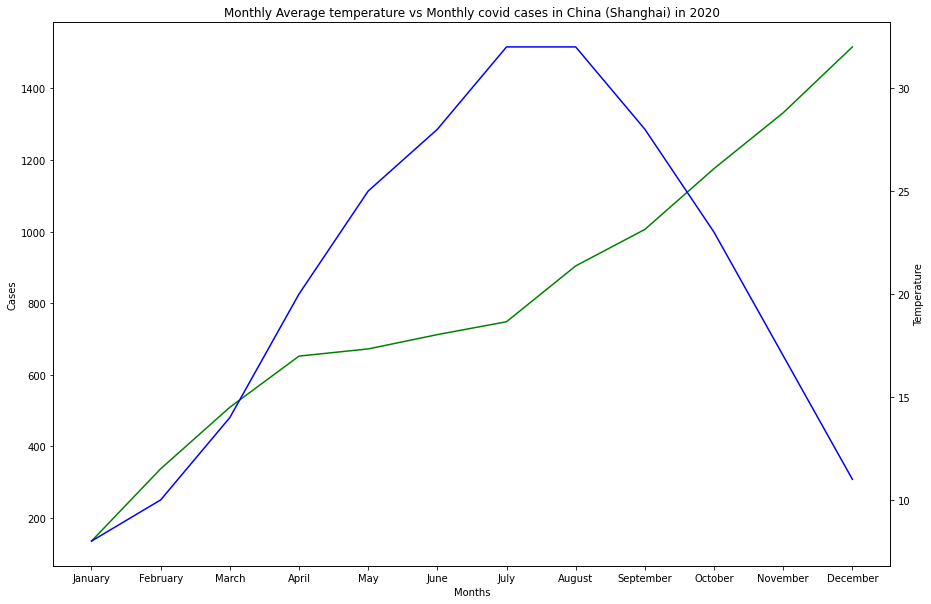

In [ ]:
china_s=df[df['Province/State']=='Shanghai']
china_s['Date']=pd.to_datetime(china_s['Date'])

start = datetime.datetime(2020,1,1)
end = datetime.date(start.year, 12, 31)
business_days =pd.date_range(start, end, freq='BM')

confirmed_monthly=[]
for i in business_days:
  confirmed_monthly.append(int(china_s[china_s['Date']==i]['Confirmed']))


monthlyAvg=list(climate[climate['city']=='Shanghai']['monthlyAvg'])
ma=[]
for i in range(0,12):
  ma.append(monthlyAvg[0][i]['high'])


temp=pd.DataFrame({"month":['January','February','March','April','May','June', 'July','August','September','October','November','December'], "confirmed" :confirmed_monthly, "temperature":ma })
temp

x=temp['month']
y=temp['temperature']
y1=temp['confirmed']
fig, ax = plt.subplots(figsize = (15, 10))
plt.ylabel('Cases')
plt.xlabel('Months')

plt.title('Monthly Average temperature vs Monthly covid cases in China (Shanghai) in 2020')
ax2 = ax.twinx()
plt.ylabel('Temperature')
ax.plot(x, y1, color = 'g')
ax2.plot(x, y, color = 'b')
plt.show()


# Correlation

In [ ]:
y1.corr(y)

0.21814872679865754

# 10 Articulate your own research question related to COVID-19 and try to provide an answer to it using the given data set.

1. What are the total confirmed cases in the world?

2. What are the total deaths registered in the world?

3. Case Fatality ratio (World)?


In [ ]:
#1
timeseries['Total Confirmed'].sum()

190883575

In [ ]:
#2
timeseries['Total Deaths'].sum()

4095730

In [ ]:
#3
timeseries['Total Deaths'].sum()/timeseries['Total Confirmed'].sum()

0.021456691598530676